In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Case Data.csv', sep=",")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309707 entries, 0 to 309706
Data columns (total 11 columns):
﻿id чека          309707 non-null object
Дата и время      309707 non-null object
ИНН               309707 non-null object
IDПользователя    309707 non-null object
Товар             309707 non-null object
Бренд             131212 non-null object
Теги              181316 non-null object
Цена              309655 non-null float64
Кол-во            309655 non-null float64
Сумма             309655 non-null float64
Кэшбэк            56155 non-null float64
dtypes: float64(4), object(7)
memory usage: 26.0+ MB


In [4]:
columns=df.columns

In [5]:
#Nans per column
df2=df.isna().sum()

In [6]:
df2

﻿id чека               0
Дата и время           0
ИНН                    0
IDПользователя         0
Товар                  0
Бренд             178495
Теги              128391
Цена                  52
Кол-во                52
Сумма                 52
Кэшбэк            253552
dtype: int64

In [7]:
df1=df2/np.float(len(df))

In [8]:

df1

﻿id чека          0.000000
Дата и время      0.000000
ИНН               0.000000
IDПользователя    0.000000
Товар             0.000000
Бренд             0.576335
Теги              0.414556
Цена              0.000168
Кол-во            0.000168
Сумма             0.000168
Кэшбэк            0.818683
dtype: float64

In [9]:
Nans=df.isna().any(axis=1)

In [10]:
#Total amount of rows with Nan
Nans.sum()

259220

In [11]:
np.float(Nans.sum())/np.float(len(df))

0.8369846338636194

Как видно из массива df2 наибольшее количество пропущенных значений находится в столбцах бренд (178495, 58% от общего числа строк), теги (128391, 41%) и кэшбек (253552, 82%). Число пропущенных значений в остальных категориях пренебрежимо мало. Общее количество строк с nan 259220, что составляет 84%.

In [12]:
from efficient_apriori import apriori


In [13]:
df.columns

Index(['﻿id чека', 'Дата и время', 'ИНН', 'IDПользователя', 'Товар', 'Бренд',
       'Теги', 'Цена', 'Кол-во', 'Сумма', 'Кэшбэк'],
      dtype='object')

In [81]:
df['Теги']=np.where(df['Теги']=='упаковка; пакеты; прочее',np.nan,df['Теги'])
df['Теги']=np.where(df['Теги']=='пакеты; прочее; упаковка',np.nan,df['Теги'])
df['Теги']=np.where(df['Теги']=='пакеты; упаковка; прочее',np.nan,df['Теги'])
df['Теги']=np.where(df['Теги']=='прочее; упаковка; пакеты',np.nan,df['Теги'])


df['Теги']=np.where(df['Теги']=='прокладки; личная гигиена; красота и здоровье','прокладки; красота и здоровье; личная гигиена',df['Теги'])
df['Теги']=np.where(df['Теги']=='личная гигиена; прокладки; красота и здоровье','прокладки; красота и здоровье; личная гигиена',df['Теги'])
df['Теги']=np.where(df['Теги']=='красота и здоровье; прокладки; личная гигиена','прокладки; красота и здоровье; личная гигиена',df['Теги'])
df['Теги']=np.where(df['Теги']=='пюре детское; детское питание','детское питание; пюре детское',df['Теги'])

In [82]:
df['Бренд'].fillna(value='dummy',inplace=True)
df['Цена'].fillna(value='dummy',inplace=True)
df['Кол-во'].fillna(value='dummy',inplace=True)
df['Сумма'].fillna(value='dummy',inplace=True)
df['Кэшбэк'].fillna(value='dummy',inplace=True)
df.dropna(axis=0,inplace=True)

In [83]:
df

,﻿id чека,Дата и время,ИНН,IDПользователя,Товар,Бренд,Теги,Цена,Кол-во,Сумма,Кэшбэк
0,0000a622f9c8f1821ca549fbcfd47405,21.12.2019 15:15,2310031475,2700449a73d4cb9d8e909c706bf16fbe,libresse natural care ultra прокладки normal 10ш,libresse,личная гигиена; красота и здоровье; прокладки,63.20,2.000,126.40,dummy
7,0000ff080b0a96172c95b3aa6f34980d,14.12.2019 18:33,2310031475,417fef3a42028cb612da47fff7b829f3,discreet deo ежедн прокладки water,discreet,прокладки; красота и здоровье; личная гигиена,109.90,1.000,109.90,12.99
8,0000ff080b0a96172c95b3aa6f34980d,14.12.2019 18:33,2310031475,417fef3a42028cb612da47fff7b829f3,hochland сыр плавл чизбургер тост,hochland,молоко/сыр/яйца; сыр; продукты; плавленный,59.90,1.000,59.90,dummy
10,0000ff080b0a96172c95b3aa6f34980d,14.12.2019 18:33,2310031475,417fef3a42028cb612da47fff7b829f3,кубай питьевая вода негаз 5л(мерку,кубай,вода минеральная; напитки; продукты,56.90,1.000,56.90,dummy
13,0000ff080b0a96172c95b3aa6f34980d,14.12.2019 18:33,2310031475,417fef3a42028cb612da47fff7b829f3,с пылу с жару блинчики с творогом,dummy,блины; полуфабрикаты и готовые блюда; продукты,39.90,2.000,79.80,dummy
15,00011b384dff1067131b3ecaea35382f,07.12.2019 14:09,2310031475,c8142fe20d51c0875ab409128c0a6477,"krusovice imperial пиво светлое паст 0,5л ж/б(...",krusovice,алкоголь; пиво; пастеризованное; пиво светлое,74.92,1.000,74.92,dummy
16,00011b384dff1067131b3ecaea35382f,07.12.2019 14:09,2310031475,c8142fe20d51c0875ab409128c0a6477,lays из печи чипсы карт лисички в сметане 85г ...,lays,чипсы; снеки; продукты,59.90,1.000,59.90,dummy
17,00011b384dff1067131b3ecaea35382f,07.12.2019 14:09,2310031475,c8142fe20d51c0875ab409128c0a6477,pampers трусики-подг 6 extra large (16+кг) 88ш...,pampers,трусики-подгузники; forp&g; уход за ребенком; ...,1679.00,1.000,1679.00,167.9
18,00011b384dff1067131b3ecaea35382f,07.12.2019 14:09,2310031475,c8142fe20d51c0875ab409128c0a6477,"белая птица печень 0,8кг лоток(ново-ездоцкая):5",dummy,субпродукты; печень; мясо/рыба; продукты,97.42,1.000,97.42,dummy
19,00011b384dff1067131b3ecaea35382f,07.12.2019 14:09,2310031475,c8142fe20d51c0875ab409128c0a6477,простоквашино сметана 15% 315г пл/ст (юнимилк):12,простоквашино,продукты; сметана; молоко/сыр/яйца,49.90,1.000,49.90,dummy


In [84]:
df1=df.groupby('﻿id чека')['Теги'].apply(list)

In [85]:
df1.shape

(43842,)

In [86]:
records = []
for i in range(43842):
    records.append(df1[i])

In [87]:
itemsets, rules = apriori(records, min_support=0.003,  min_confidence=0.01)
print(rules)

[{прочее; лояльность} -> {прокладки; красота и здоровье; личная гигиена}, {прокладки; красота и здоровье; личная гигиена} -> {прочее; лояльность}, {шампунь для волос; гигиена волос; красота и здоровье} -> {прокладки; красота и здоровье; личная гигиена}, {прокладки; красота и здоровье; личная гигиена} -> {шампунь для волос; гигиена волос; красота и здоровье}, {прокладки; красота и здоровье; личная гигиена} -> {личная гигиена; красота и здоровье; прокладки}, {личная гигиена; красота и здоровье; прокладки} -> {прокладки; красота и здоровье; личная гигиена}, {прокладки; красота и здоровье; личная гигиена} -> {детское питание; пюре детское}, {детское питание; пюре детское} -> {прокладки; красота и здоровье; личная гигиена}, {прокладки; красота и здоровье; личная гигиена} -> {красота и здоровье; личная гигиена; прокладки}, {красота и здоровье; личная гигиена; прокладки} -> {прокладки; красота и здоровье; личная гигиена}, {продукты; мандарины; фрукты; овощи/фрукты/ягоды} -> {продукты; банан; 

In [88]:
rules_rhs = filter(lambda rule: len(rule.lhs) >= 1 and len(rule.rhs) >= 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
    print(rule)

{шампунь для волос; гигиена волос; красота и здоровье} -> {прокладки; красота и здоровье; личная гигиена} (conf: 0.135, supp: 0.003, lift: 0.834, conv: 0.969)
{прокладки; красота и здоровье; личная гигиена} -> {шампунь для волос; гигиена волос; красота и здоровье} (conf: 0.019, supp: 0.003, lift: 0.834, conv: 0.996)
{прочее; лояльность} -> {прокладки; красота и здоровье; личная гигиена} (conf: 0.158, supp: 0.005, lift: 0.978, conv: 0.996)
{прокладки; красота и здоровье; личная гигиена} -> {прочее; лояльность} (conf: 0.032, supp: 0.005, lift: 0.978, conv: 0.999)
{прокладки; красота и здоровье; личная гигиена} -> {личная гигиена; красота и здоровье; прокладки} (conf: 0.056, supp: 0.009, lift: 1.019, conv: 1.001)
{личная гигиена; красота и здоровье; прокладки} -> {прокладки; красота и здоровье; личная гигиена} (conf: 0.165, supp: 0.009, lift: 1.019, conv: 1.004)
{прокладки; красота и здоровье; личная гигиена} -> {детское питание; пюре детское} (conf: 0.019, supp: 0.003, lift: 1.227, conv:

{прокладки; красота и здоровье; личная гигиена} -> {детское питание; пюре детское}, {продукты; банан; фрукты; овощи/фрукты/ягоды} -> {прокладки; красота и здоровье; личная гигиена} являются неочевидными взаимосвязями. Показатель supp=0.003, conf=0.019 в первом и conf=0.243, supp=0.004 во втором

In [94]:
def count_brand(dataset, brand_name, parser):
    found_rows = df['Бренд'].str.contains(parser).sum()
    print(brand_name + ":", "%0.0f" % df['Бренд'].str.contains(parser).sum())
    return found_rows

In [95]:
df = pd.read_csv('Case Data.csv', sep=",")

In [99]:
brends=['pampers','ariel','tide','миф','lenor','always','tampax','naturella','discreet','braun','gillette','venus','head&shoulders','pantene','herbal essences','aussie','bear fruits','fairy','mr.proper','oral-b','blend-a-med','clearblue','old spice','safeguard']

In [117]:
stat=pd.DataFrame(np.array([np.zeros(24)]),columns=brends)

In [118]:
stat

,pampers,ariel,tide,миф,lenor,always,tampax,naturella,discreet,braun,...,herbal essences,aussie,bear fruits,fairy,mr.proper,oral-b,blend-a-med,clearblue,old spice,safeguard
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
for brend in brends:
    stat[brend]=count_brand(df,brend,brend)

pampers: 3505
ariel: 2523
tide: 1960
миф: 265
lenor: 5207
always: 10737
tampax: 228
naturella: 2985
discreet: 6244
braun: 3
gillette: 5718
venus: 1122
head&shoulders: 3658
pantene: 3848
herbal essences: 0
aussie: 356
bear fruits: 0
fairy: 4266
mr.proper: 0
oral-b: 1106
blend-a-med: 1764
clearblue: 64
old spice: 2315
safeguard: 1014


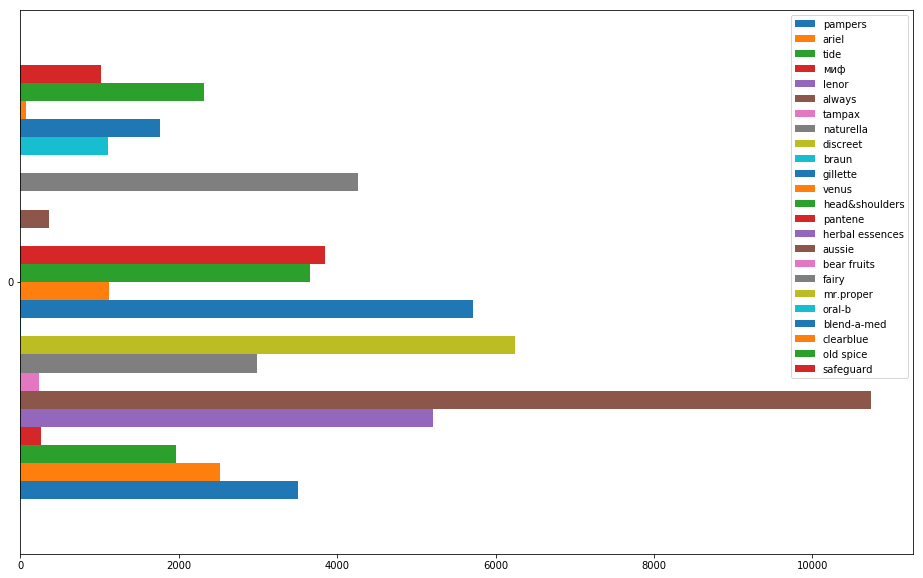

In [144]:
stat.plot.barh(figsize=(16,10),width=2)

plt.legend()
plt.show()

Как можно видеть из приведенной диаграммы, наиболее популярными брендами являются 'Always','Discreet' и 'Gillette' в порядке убывания популярности.